In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
import random

In [16]:
file_name = 'R15.txt'
k = 5
data = np.loadtxt(file_name)
label = data[:, 2].reshape(data.shape[0], 1)
data = data[:, 0:2]

In [39]:
def plot_data(data, label):
    max_lb = np.int32(label.max())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(max_lb+1):
        idx = np.argwhere(label == i)[:, 0]
        ax.scatter(data[idx, 0], data[idx, 1], marker='o', cmap=plt.cm.jet(i))
    plt.show()

In [109]:
def knn(x, data, label, k):
    temp = np.copy(data)
    temp = np.vstack([x, data])
    label = label.copy()
    label = np.vstack([-1, label])
    distance_matrix = distance.squareform(distance.pdist(temp))
    dist = distance_matrix[0, :].reshape(1, distance_matrix.shape[1])
    idx = np.argsort(dist)[0, 1:k+1]
#     print(label.shape)
#     print(idx)
    temp_label = label[idx][:, 0]
    lb_dict = {}
    for i in temp_label:
        if lb_dict.get(i):
            lb_dict[i] += 1
        else:
            lb_dict[i] = 1
    back_items = [[v[1], v[0]] for v in lb_dict.items()]
    back_items.sort(reverse=True)
    return back_items[0][1]

In [116]:
def error_rate(label, true_label):
    x = 0
    for i in range(len(true_label)):
        if label[i] != true_label[i]:
            x += 1
    return x / len(true_label)

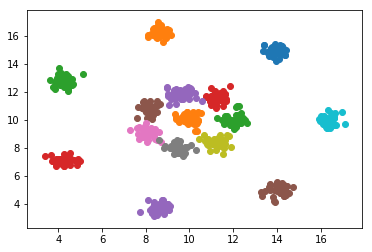

In [103]:
plot_data(data, label)

In [125]:
idx = list(range(data.shape[0]))
random.shuffle(idx)

In [126]:
train_num = int(data.shape[0] * 0.7)
train_idx = idx[:train_num]
test_idx = idx[train_num+1:]

In [127]:
train_data = data[train_idx, :]
test_data = data[test_idx, :]
train_label = label[train_idx].reshape(len(train_idx), 1)
test_label = label[test_idx]

In [128]:
tl = []
for y in test_data:
    tl.append(knn(y, train_data, train_label, k))
    
print(error_rate(tl, test_label))

0.0223463687150838
